# MLP Model Example

In [1]:
batch_size = 10
num_classes = 3
epochs = 200

In [2]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras import optimizers

import matplotlib.pyplot as plt
def hist_view(hist):
  print('## training loss and acc ##')
  fig, loss_ax = plt.subplots()
  acc_ax = loss_ax.twinx()

  loss_ax.plot(hist.history['loss'], 'y', label='train loss')
  loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

  loss_ax.set_xlabel('epoch')
  loss_ax.set_ylabel('loss')
  loss_ax.legend(loc='center')

  acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
  acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')
  acc_ax.set_ylabel('accuracy')
  acc_ax.legend(loc='center right')

  plt.show()

In [3]:
# from sklearn import datasets
# iris = datasets.load_iris()
# x=iris.data
import pandas as pd
![ ! -f  iris0.csv ]&&wget http://j.finfra.com/_file/iris0.csv
iris=pd.read_csv("iris0.csv")



--2021-02-01 07:04:21--  http://j.finfra.com/_file/iris0.csv
Resolving j.finfra.com (j.finfra.com)... 211.252.85.187
Connecting to j.finfra.com (j.finfra.com)|211.252.85.187|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3730 (3.6K) [text/csv]
Saving to: ‘iris0.csv’

iris0.csv           100%[===================>]   3.64K  --.-KB/s    in 0s      

2021-02-01 07:04:22 (672 MB/s) - ‘iris0.csv’ saved [3730/3730]



In [4]:
x=iris.iloc[:,0:4].values
y_text=iris.iloc[:,4:5]

sets=y_text.drop_duplicates()["Species"].tolist()
encoder={k:v for v,k in enumerate(sets)}
y_num=[ encoder[i] for i in y_text["Species"].tolist() ]




In [5]:
# iris.target → y
y= keras.utils.to_categorical(y_num, num_classes)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
x_train.shape,x_test.shape,y_train.shape,y_test.shape


((105, 4), (45, 4), (105, 3), (45, 3))

In [6]:
from keras.layers import BatchNormalization, Dropout
from keras import regularizers

l2=regularizers.l2(l2=0.01)


model = Sequential()

model.add(Dense(6, activation='relu', input_shape=(4,)))
model.add(BatchNormalization())

model.add(Dense(4, activation='relu',kernel_regularizer=l2))

model.add(Dropout(0.2))

model.add(Dense(4, activation='relu',kernel_regularizer='l1'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

from keras import regularizers
l2=regularizers.l2(l2=0.01)
model.add(Dense(4, activation='relu',kernel_regularizer=l2))

model.add(Dense(num_classes, activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 30        
_________________________________________________________________
batch_normalization (BatchNo (None, 6)                 24        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 28        
_________________________________________________________________
dropout (Dropout)            (None, 4)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dropout_1 (Dropout)          (None, 4)                 0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 4)                 1

In [7]:
adam=optimizers.Adam(0.001)
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])


In [8]:
# batch_size,epochs
hist=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=0,
          validation_data=(x_test, y_test))



## training loss and acc ##


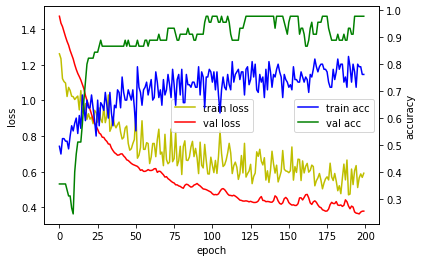

Test loss: 0.37944692373275757
Test accuracy: 0.9777777791023254


In [9]:
hist_view(hist)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


In [10]:
decoder = {k:v for k,v in enumerate( sets )}
decoder

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}

In [11]:
r=np.argmax(model.predict(x_test[:10,:]), axis=-1)
[decoder[i] for i in r]

['virginica',
 'versicolor',
 'setosa',
 'virginica',
 'setosa',
 'virginica',
 'setosa',
 'versicolor',
 'versicolor',
 'versicolor']

# Model Save

## 1. Weigth 정보의 저장

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
model.save("/content/drive/MyDrive/iris_model.h5")

## 2. 모델 구조 저장
* 모델은 Json파일로 저장되고 Weigth파일은 h5 형태로 저장

In [16]:
model_json = model.to_json()
with open("/content/drive/MyDrive/iris_model.json", "w") as json_file:
    json_file.write(model_json)
